# Tarea #4: MA5203 Aprendizaje de Máquinas Probabilístico

##  Redes Neuronales y MNIST (75%)

En esta tarea deberán implementar una __red neuronal convolucional__ (CNN) profunda para resolver el problema de clasificación de las imágenes de dígitos escritos a mano (MNIST), en donde se espera que alcancen mayores niveles de accuracy que con la red neuronal feedforward mostrada en el tutorial de TensorFlow.

Para esto:
> + Diseñarán la arquitectura de una red convolucional <br>
> + Ajustarán un algoritmo de optimización de su preferencia <br>
> + Regularizarán la red neuronal <br>

### 1) Instrucciones

Debe entregar el Jupyter Notebook completando en el código las secciones indicadas y señalizadas específicamente por (...). Puede agregar o quitar partes del diseño de la arquitectura como estime conveniente. También deberá entregar un informe de __máximo 2 planas__ que incluya:

> + Arquitectura de la red <br>
> + Ajuste de hiperparámetros y optimizador elegido<br>
> + Regularización y entrenamiento <br>
> + Presentación de resultados <br>
> + Análisis de resultados y conclusiones <br>



In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import sys
import tempfile

import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

import tensorflow as tf

FLAGS = None

config = tf.ConfigProto()
config.gpu_options.allocator_type='BFC'

### 2) Fase de construcción

La primera función a construir es _deepnn()_, que construye el grafo con la arquitectura de la red convolucional con la que se resolverá el problema. Esta debe contener la siguiente estructura (como mínimo) dentro de los _name scopes_:
+ 'reshape': haz un reshape al input para usarlo dentro de una red convolucional (https://www.tensorflow.org/api_docs/python/tf/reshape) <br>
+ capa de convolución (se recomienda más de 1):
> + 'conv': capa de convolución <br>
> + 'pool': capa de pooling <br>
> + 'fc': capa fully connected <br>
+ 'droput': máscara de dropout para regularización (puede usar otra técnica) (https://www.tensorflow.org/api_docs/python/tf/nn/dropout) <br>
+ 'cl_layer': capa de clasificaciÃ³n <br>

In [2]:
def deepnn(x):
    """
  Función que construye el grafo de una red profunda
  
  --------PUEDE AGREGAR O QUITAR ELEMENTOS DE LA CAPA PREDEFINIDA MÃS ADELANTE------
  
  Args:
    x: tensor de input con dimensiones (N_examples, 784)
  Returns:
    Una tupla (y, keep_prob), con y un tensor de dimensión (N_examples, 10),
    con los valores de los logits de clasificar el dígito en una de las 10 classes,
    y keep_prob un escalar placeholder para la probabilidad de dropout.
  """
  
  ####----------------- (1) COMPLETAR ---------------------#####
    
    # Reshape para usar input en una red convolucional (hint: se debe hacer un 'flatten' a 1D)
    with tf.name_scope('reshape'):
        x_image = tf.reshape(x, [-1, 28, 28, 1], name="model_input") # [batch, in_height, in_width, in_channels]
        
  ####---------------- fin completar -----------------#####

  ####----------------- (2) COMPLETAR ---------------------#####
    
    with tf.name_scope('conv1'):
        W_conv1 = weight_variable([2, 2, 1, 28]) # [filter_height, filter_width, in_channels, out_channels]
        b_conv1 = bias_variable([28])
        # Ver el bloque de más abajo para las funciones conv2d, max_pool_2x2,
        # weight_variable, y bias_variable
        h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)

    with tf.name_scope('pool1'):
        h_pool1 = max_pool_2x2(h_conv1)

    with tf.name_scope('conv2'):
        W_conv2 = weight_variable([2, 2, 28, 28])
        b_conv2 = bias_variable([28])
        h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)

    with tf.name_scope('pool2'):
        h_pool2 = max_pool_2x2(h_conv2)

    with tf.name_scope('fc1'):
        W_fc1 = weight_variable([7*7*28, 196]) # [in_channels, out_channels]
        b_fc1 = bias_variable([196]) 

        # El argumento -1 hace 'flatten' a 1D
        h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*28], name="pool2_flat") # [batches, height * width * channels]
        h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
        
  ####---------------- fin completar -----------------#####

 ####----------------- (3) COMPLETAR ---------------------#####
    
    # Implementar regularizaciÃ³n por dropout
    with tf.name_scope('dropout'):
        keep_prob = tf.placeholder(tf.float32, name="dropout_prob")
        h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)
        
  ####---------------- fin completar -----------------#####

 ####----------------- (4) COMPLETAR ---------------------#####
    
  # Map un nÃºmero de features al nÃºmero de clases
    with tf.name_scope('cl_layer'):
        W_fc2 = weight_variable([196, 10])
        b_fc2 = bias_variable([10])

        y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2
    return y_conv, keep_prob
        
  ####---------------- fin completar -----------------#####

A continuación se definen funciones que le serán útiles para la arquitectura definida en deep_nn():

In [3]:
def conv2d(x, W):
    """conv2d retorna una capa de convolución 2D con full stride"""
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')


def max_pool_2x2(x):
    """max_pool_2x2 hace downsample al feature map por 2X"""
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

 ####----------------- (5) COMPLETAR ---------------------##### 

def weight_variable(shape):
    """weight_variable genera una variable de peso dadas ciertas dimensiones"""
    randn = tf.truncated_normal(shape, seed=1)
    scalar = tf.sqrt(tf.divide(tf.constant(2.0), tf.size(randn, out_type=tf.float32)))
    initial = tf.scalar_mul(scalar, randn)
    return tf.Variable(initial, name="weights") # w = randn(n) * sqrt(2/n) (He et al.)


def bias_variable(shape):
    """bias_variable genera una variable de bias variable dado cierto shape"""
    initial = tf.constant(0.0, shape=shape)
    return tf.Variable(initial, name="biases") # b = 0.0
        
  ####---------------- fin completar -----------------#####

### 3) Fase de ejecución

En esta etapa, antes de ejecutar la sesión deberá definir los name scopes de:
+ 'loss': función de costos a optimizar <br>
+ 'my_optimizer': algoritmo de optimización e hiperparámetros que utilizará en el entrenamiento <br>
Algunas opciones (se valorizará el uso de un algoritmo distinto al mostrado en el tutorial):
> + __Descenso por el gradiente__, __descenso estocástico por el gradiente__, __descenso por el gradiente con mini-batches__: https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer <br>
> + __RMSProp__ (algoritmo con momentum): https://www.tensorflow.org/api_docs/python/tf/train/RMSPropOptimizer <br>
> + __Adagrad__ (algoritmo con learning rates adaptativos): https://www.tensorflow.org/api_docs/python/tf/train/AdagradOptimizer <br>
> + __Adam__ (algoritmo con momentum y learning rates adaptativos): https://www.tensorflow.org/api_docs/python/tf/train/AdamOptimizer <br>
+ 'accuracy': métrica de desempeño

__Tenga en consideración que la siguiente etapa puede tomar una cantidad significativa de tiempo (3 min ~ 1,000 epochs)__

In [4]:
# Función que realiza la fase de ejecuciÃ³n
def main(mnist_data):
    # Importar datos
    mnist = input_data.read_data_sets(FLAGS.data_dir, one_hot=True)

 ####----------------- (6) COMPLETAR ---------------------#####
    
    # Inputs, etiquetas, y output de la red convolucional
    x = tf.placeholder(tf.float32, [None, 784])

    y_ = tf.placeholder(tf.int64, [None, 10])

    y_conv, keep_prob = deepnn(x)
    

        
  ####---------------- fin completar -----------------#####

 ####----------------- (7) COMPLETAR ---------------------#####
    
    # FunciÃ³n objetivo, optimizador y evaluaciÃ³n
    with tf.name_scope('loss'):
        cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=y_conv)
    cross_entropy = tf.reduce_mean(cross_entropy)

    with tf.name_scope('my_optimizer'):
        train_step = tf.train.AdamOptimizer().minimize(cross_entropy)

    with tf.name_scope('accuracy'):
        correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
        correct_prediction = tf.cast(correct_prediction, tf.float32)
    accuracy = tf.reduce_mean(correct_prediction)
    
    with tf.name_scope('confusion_matrix'):
        conf_matrix = tf.confusion_matrix(tf.argmax(y_, 1), tf.argmax(y_conv, 1))
        
  ####---------------- fin completar -----------------#####

    graph_location = tempfile.mkdtemp()
    print('Saving graph to: %s' % graph_location)
    train_writer = tf.summary.FileWriter(graph_location)
    train_writer.add_graph(tf.get_default_graph())

 ####----------------- (8) COMPLETAR ---------------------#####
    
    # Ejecutar la sesiÃ³n que entrena la red convolucional
    with tf.Session(config=config) as sess:
        #Inicialice las variables
        sess.run(tf.global_variables_initializer())
        epoch = []
        train_acc = []
        val_acc = []
        test_acc = []
        for i in range(15000):
            X_batch, y_batch = mnist.train.next_batch(40)
            # Imprimir mÃ©tricas cada 100 epochs
            if i % 100 == 0:
                train_accuracy = accuracy.eval(feed_dict={x: X_batch, y_: y_batch, keep_prob: 1.0})
                print('step %d, training set accuracy %g' % (i, train_accuracy))
                
                X_val, y_val = mnist.validation.next_batch(100)
                validation_accuracy = accuracy.eval(feed_dict={x: X_val, y_: y_val, keep_prob: 1.0})
                print('validation set accuracy %g' % validation_accuracy)
                
                X_test, y_test = mnist.test.next_batch(100)
                test_accuracy = accuracy.eval(feed_dict={x: X_test, y_: y_test, keep_prob: 1.0})
                print('test set accuracy %g' % test_accuracy)
                epoch.append(i)
                train_acc.append(train_accuracy)
                val_acc.append(validation_accuracy)
                test_acc.append(test_accuracy)
            # El argumento keep_prob indica la probabilidad de mantener un nodo de input
            # (es dropout aplicado al input)
            train_step.run(feed_dict={x: X_batch, y_: y_batch, keep_prob: 0.5})
        
        predict_x, predict_y = mnist.test.next_batch(1000)
        feed_dict = {x: predict_x, y_: predict_y, keep_prob: 1.0}
        print("Confusion matrix:")
        print(conf_matrix.eval(feed_dict))
        
    
    #Plotear curvas de aprendizaje
    plt.figure(figsize=(10, 5))
    plt.plot(epoch, train_acc, label="Entrenamiento")
    plt.plot(epoch, val_acc, label="Validacion")
    plt.plot(epoch, test_acc, label="Prueba")
    plt.legend()
    plt.xlabel("Epocas")
    plt.ylabel("Accuracy")
    plt.title("Curvas de aprendizaje")
    
    plt.show()
  ####---------------- fin completar -----------------#####
            

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/tensorflow/mnist/input_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/tensorflow/mnist/input_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/tensorflow/mnist/input_data/t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Saving graph to: /tmp/tmpn6wvarkv
step 0, training set accuracy 0.05
validation set accuracy 0.11
test set accuracy 0.06
step 100, training set accuracy 0.75
validation set accuracy 0.76
test set accuracy 0.76
ste

step 6600, training set accuracy 0.975
validation set accuracy 0.97
test set accuracy 0.98
step 6700, training set accuracy 0.975
validation set accuracy 1
test set accuracy 1
step 6800, training set accuracy 1
validation set accuracy 0.99
test set accuracy 0.97
step 6900, training set accuracy 1
validation set accuracy 0.98
test set accuracy 0.99
step 7000, training set accuracy 1
validation set accuracy 0.99
test set accuracy 0.99
step 7100, training set accuracy 1
validation set accuracy 1
test set accuracy 0.98
step 7200, training set accuracy 1
validation set accuracy 1
test set accuracy 0.99
step 7300, training set accuracy 1
validation set accuracy 0.98
test set accuracy 1
step 7400, training set accuracy 1
validation set accuracy 0.99
test set accuracy 1
step 7500, training set accuracy 0.95
validation set accuracy 0.99
test set accuracy 0.99
step 7600, training set accuracy 1
validation set accuracy 0.97
test set accuracy 1
step 7700, training set accuracy 1
validation set acc

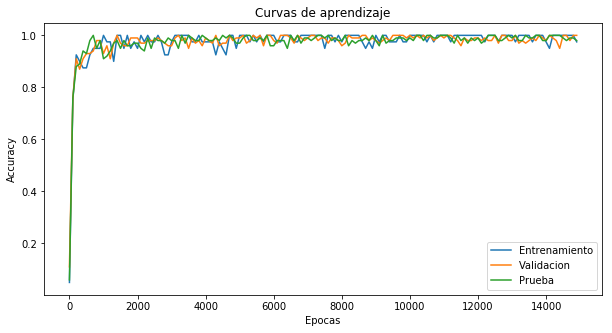

SystemExit: 

/home/sparra/anaconda2/envs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2971: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [5]:
# Esta parte del cÃ³digo ejecuta la funciÃ³n main(). No necesitas modificarla
if __name__ == '__main__':
    parser = argparse.ArgumentParser()
    parser.add_argument('--data_dir', type=str,
                      default='/tmp/tensorflow/mnist/input_data',
                      help='Directory for storing input data')
    FLAGS, unparsed = parser.parse_known_args()
    tf.app.run(main=main, argv=[sys.argv[0]] + unparsed)

### 4) Resultados

Muestre curvas de aprendizaje (e.g., pérdida en función de épocas), comparación entre los distintos sets, matrices de confusión y análisis de error en el resultado

## Proyecto (25%)

Defina sucintamente el objetivo de su proyecto, enmÃ¡rquelo en alguna de las temÃ¡ticas del curso (regresiÃ³n, clasificaciÃ³n, clustering, reducciÃ³n de dimensionalidad, etc.) e identifique sus datos con la notaciÃ³n vista en clase (e.g., defina sus _inputs_ y _labels_ si su problema es de clasificaciÃ³n). AdemÃ¡s, explore las herramientas clÃ¡sicas para resolver su problema e implemente al menos una con sus datos. 

ExtensiÃ³n mÃ¡xima para esta parte: **2 pÃ¡ginas**.